In [154]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

In [155]:

data_dir = "animal_dataset"
classes = ['cat', 'dog', 'panda']
X = []
y = []

print(f"Loading data from {data_dir}...")

if os.path.exists(data_dir):
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            print(f"Warning: Directory {class_dir} not found. Skipping.")
            continue

        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)

            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            img = cv2.imread(img_path)

            if img is None:
                print(f"Warning: Could not read image {img_path}. Skipping.")
                continue

            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            resized = cv2.resize(gray, (32, 32))

            features = resized.flatten()

            X.append(features)
            y.append(class_name)

    X = np.array(X)
    y = np.array(y)
    print(f"Data loaded. X shape: {X.shape}, y shape: {y.shape}")
else:
    print(f"Error: Directory {data_dir} does not exist.")

Loading data from animal_dataset...
Data loaded. X shape: (300, 1024), y shape: (300,)


In [156]:

if len(X) > 0:

    cv = StratifiedKFold(n_splits=5, shuffle=True)


    k_values = range(1, 21)

    l1_accuracies = []
    l2_accuracies = []

    print("Starting 5-fold Cross-Validation...")

    for k in k_values:

        knn_l1 = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
        scores_l1 = cross_val_score(knn_l1, X, y, cv=cv, scoring='accuracy')
        l1_accuracies.append(scores_l1.mean())

        knn_l2 = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
        scores_l2 = cross_val_score(knn_l2, X, y, cv=cv, scoring='accuracy')
        l2_accuracies.append(scores_l2.mean())

        print(f"K={k}: L1 Acc={l1_accuracies[-1]:.4f}, L2 Acc={l2_accuracies[-1]:.4f}")

Starting 5-fold Cross-Validation...
K=1: L1 Acc=0.3800, L2 Acc=0.3533
K=2: L1 Acc=0.3467, L2 Acc=0.3267
K=3: L1 Acc=0.4000, L2 Acc=0.3400
K=4: L1 Acc=0.3533, L2 Acc=0.3567
K=5: L1 Acc=0.3900, L2 Acc=0.3800
K=6: L1 Acc=0.3467, L2 Acc=0.3400
K=7: L1 Acc=0.3800, L2 Acc=0.3567
K=8: L1 Acc=0.3967, L2 Acc=0.4000
K=9: L1 Acc=0.3967, L2 Acc=0.3933
K=10: L1 Acc=0.4433, L2 Acc=0.3933
K=11: L1 Acc=0.4367, L2 Acc=0.3967
K=12: L1 Acc=0.4400, L2 Acc=0.3900
K=13: L1 Acc=0.4367, L2 Acc=0.3800
K=14: L1 Acc=0.4067, L2 Acc=0.3933
K=15: L1 Acc=0.4400, L2 Acc=0.3800
K=16: L1 Acc=0.4100, L2 Acc=0.3567
K=17: L1 Acc=0.4100, L2 Acc=0.3933
K=18: L1 Acc=0.4067, L2 Acc=0.3967
K=19: L1 Acc=0.4333, L2 Acc=0.4100
K=20: L1 Acc=0.4267, L2 Acc=0.3967


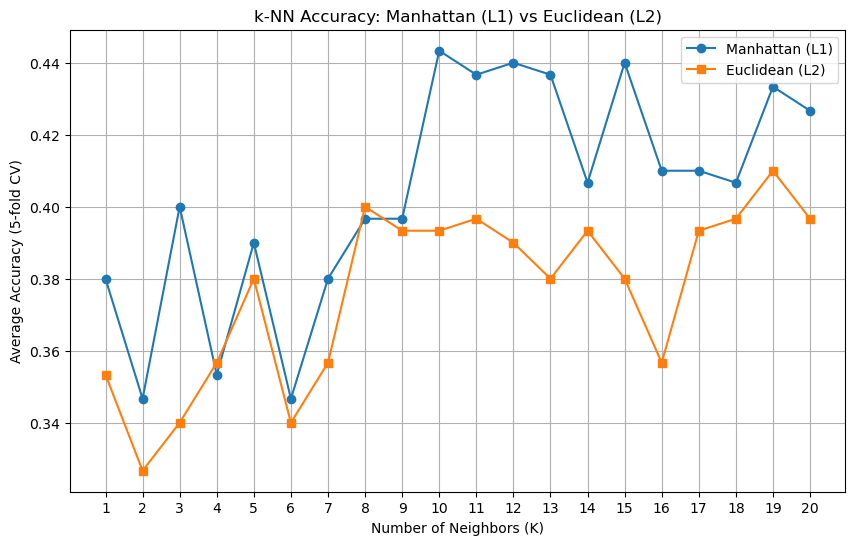

In [157]:

if len(X) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, l1_accuracies, marker='o', label='Manhattan (L1)')
    plt.plot(k_values, l2_accuracies, marker='s', label='Euclidean (L2)')

    plt.title('k-NN Accuracy: Manhattan (L1) vs Euclidean (L2)')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Average Accuracy (5-fold CV)')
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

Training final model for visualization with K=10 (L1)...


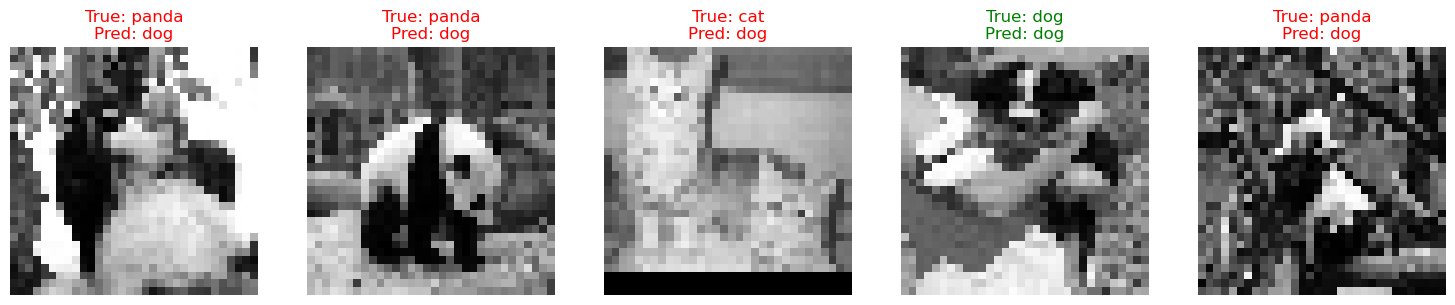

In [158]:

if len(X) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

    best_k_idx = np.argmax(l1_accuracies)
    best_k = k_values[best_k_idx]
    print(f"Training final model for visualization with K={best_k} (L1)...")

    knn_final = KNeighborsClassifier(n_neighbors=best_k, p=1)
    knn_final.fit(X_train, y_train)

    predictions = knn_final.predict(X_test[:5])

    images = X_test[:5]
    true_labels = y_test[:5]
    predicted_labels = predictions

    num_images = min(5, len(images))
    plt.figure(figsize=(15, 3))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)

        img = images[i].reshape(32, 32)
        plt.imshow(img, cmap='gray')

        color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()